In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import math
from finta import TA as ta

In [2]:
start = '2021-01-01'       # Begin date for downloading stock data format: YYYY-MM-DD         
end = dt.datetime.now()    # today

In [3]:
#Get input from the user
stock_symbol = input("Enter the ticker of the stock that you want to analyze/predict: ")

Enter the ticker of the stock that you want to analyze/predict: msft


In [16]:
stock_df = {}

In [34]:
 df = yf.download(stock_symbol,start, end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [35]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,214.934357,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,215.141693,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,209.563232,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,215.526764,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,216.839920,22956200


In [ ]:
# get data from finta for RSI, MACD,
df=df.join(pd.DataFrame(ta.RSI(df),columns=None), how='outer')
df=df.rename(columns={"14 period RSI":"RSI_14_Day"})
df=df.join(pd.DataFrame(ta.MACD(df),columns=None), how='outer')
df=df.rename(columns={"MACD":"Moving Average Convergence Divergence_MACD"})
df=df.join(pd.DataFrame(ta.TSI(df),columns=None), how='outer')
df=df.rename(columns={"TSI":"True Strength Index TSI"})

In [40]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,SIGNAL,True Strength Index TSI,signal
Date,,,,,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,214.934357,37130100,NaN,0.000000,0.000000,NaN,NaN
2021-01-05,217.259995,218.520004,215.699997,217.899994,215.141693,23823000,100.000000,0.004711,0.002617,NaN,NaN
2021-01-06,212.169998,216.490005,211.940002,212.250000,209.563232,35930700,3.336057,-0.169203,-0.067801,NaN,NaN
2021-01-07,214.039993,219.339996,213.710007,218.289993,215.526764,27694500,54.249558,-0.026084,-0.053669,NaN,NaN
2021-01-08,218.679993,220.580002,217.029999,219.619995,216.839920,22956200,59.329393,0.105158,-0.006422,NaN,NaN
2021-01-11,218.470001,218.910004,216.729996,217.490005,214.736908,23031300,49.793951,0.090995,0.019984,NaN,NaN
2021-01-12,216.500000,217.100006,213.320007,214.929993,212.209290,23249300,41.219228,-0.035627,0.005910,NaN,NaN
2021-01-13,214.020004,216.759995,213.929993,216.339996,213.601471,20087100,46.666811,-0.052899,-0.008223,NaN,NaN
2021-01-14,215.910004,217.460007,212.740005,213.020004,210.323486,29480800,37.786855,-0.228772,-0.059171,NaN,NaN


In [41]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [42]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [43]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,SIGNAL,True Strength Index TSI,signal,SMA_20,SMA_50
Date,,,,,,,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,214.934357,37130100,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
2021-01-05,217.259995,218.520004,215.699997,217.899994,215.141693,23823000,100.000000,0.004711,0.002617,NaN,NaN,NaN,NaN
2021-01-06,212.169998,216.490005,211.940002,212.250000,209.563232,35930700,3.336057,-0.169203,-0.067801,NaN,NaN,NaN,NaN
2021-01-07,214.039993,219.339996,213.710007,218.289993,215.526764,27694500,54.249558,-0.026084,-0.053669,NaN,NaN,NaN,NaN
2021-01-08,218.679993,220.580002,217.029999,219.619995,216.839920,22956200,59.329393,0.105158,-0.006422,NaN,NaN,NaN,NaN


In [44]:
# Adding volume moving average column
Volume_MA = 10
#for i in Volume_MA:
df["Vol_Avg"]= df.iloc[:,5].rolling(window=Volume_MA).mean()

In [45]:
# Adding Moving average indicator
Volume_MAI = 0
#for i in Volume_MA:
df["Vol_Avg_Ind"]= df.iloc[:,5]/df.iloc[:,8]#.rolling(window=Volume_MA).mean()

In [46]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,SIGNAL,True Strength Index TSI,signal,SMA_20,SMA_50,Vol_Avg,Vol_Avg_Ind
Date,,,,,,,,,,,,,,,
2022-03-14,280.339996,285.399994,275.820007,276.440002,275.797638,30660700,38.612553,-6.093021,-5.248343,-16.306679,-14.392702,289.194501,299.960853,33778100.0,-5.841977e+06
2022-03-15,280.350006,287.820007,278.730011,287.149994,286.482758,34245100,46.721340,-5.548995,-5.308474,-14.704537,-14.437250,288.833278,298.993586,34080830.0,-6.451026e+06
2022-03-16,289.109985,294.570007,283.200012,294.390015,293.705933,37826300,51.395349,-4.481977,-5.143174,-11.803858,-14.061051,288.560913,298.202045,34676160.0,-7.354660e+06
2022-03-17,293.290009,295.609985,289.369995,295.220001,294.533997,30816600,51.916126,-3.528707,-4.820281,-9.362219,-13.389790,288.347411,297.541361,35026370.0,-6.393113e+06
2022-03-18,295.369995,301.000000,292.730011,300.429993,299.731873,43390600,55.163666,-2.326018,-4.321428,-6.296466,-12.376458,288.831282,297.236128,36129780.0,-1.004080e+07
2022-03-21,298.890015,300.140015,294.899994,299.160004,298.464844,28351200,54.202666,-1.458543,-3.748851,-4.096294,-11.193577,289.391478,296.955336,34649180.0,-7.562637e+06
2022-03-22,299.799988,305.000000,298.769989,304.059998,303.353455,27599700,57.293957,-0.371393,-3.073360,-1.293851,-9.779331,290.206580,296.769130,32593200.0,-8.980303e+06
2022-03-23,300.510010,303.230011,297.720001,299.489990,298.794067,25715400,53.656263,0.120036,-2.434680,0.032070,-8.377702,291.165346,296.487156,31644290.0,-1.056213e+07
2022-03-24,299.140015,304.200012,298.320007,304.100006,303.393372,24484500,56.646539,0.871442,-1.773456,2.046868,-6.888478,291.639742,296.283030,31029940.0,-1.380609e+07


In [54]:
#Export to csv
df.to_csv('MSFT.csv')

In [53]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    RSI=df['RSI_14_Day']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i] and RSI[i]<=40):                          #line 9
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i] and RSI[i]>50):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)
    elif (RSI[i]<50 and RSI[i]>30):
        print('Hold')
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Down trend
Hold
Down trend
Down trend
Hold
Down trend
Down trend
Down trend
Down trend
Hold
Hold
Hold
Hold
Hold
Up trend
Buy at the price236.51809692382812
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Down trend
Sell at the price249.45309448242188
Down trend
Down trend
Hold
Hold
Hold
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Hold
Hold
Hold
Hold
Up trend
Buy at the price281.76202392578125
Up trend
Up trend
Hold
Up trend
Hold
Down trend
Sell at the price291.29254150390625
Down trend
Down trend
Down trend
Hold
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Up trend
Buy at the price314.9935302734375
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Down trend
Sell at the price312.0863037109375
Hold
Hold
Hold
H

In [55]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2021-01-04 00:00:00 up to now with 4 trades:
SMAs used: [20, 50]
Total return over 4 trades: 9.68%


In [56]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 3.461108954662162
Average Loss: -0.9229480237185506
Max Return: 5.468925095723032
Max Loss: -0.9229480237185506
Gain/loss ratio: 3.750058362677218


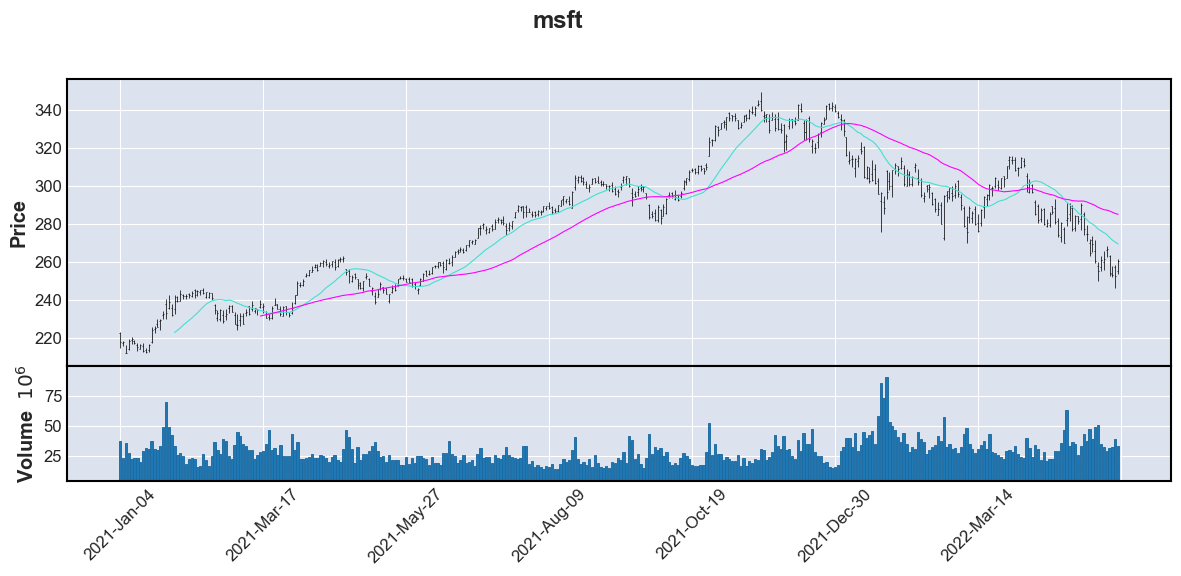

In [58]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), 
         mav=(short_sma,long_sma), 
         volume=True, title= str(stock_symbol), 
         style='default')